In [37]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from sklearn.tree import plot_tree

## Import data

In [5]:
data = pd.read_csv("Iris.csv")

In [6]:
print('dataset length:',len(data))
print('dataset shape:',data.shape)
print(data.head())

dataset length: 150
dataset shape: (150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


## Seperate data out

In [12]:
X = data.iloc[:,1:5]
Y=data.iloc[:,-1]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

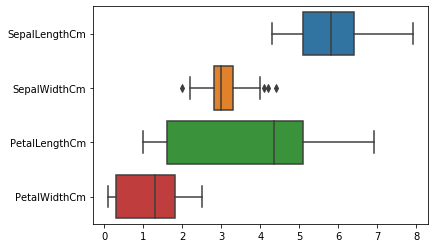

In [41]:
import seaborn as sns
sns.boxplot(data=X,orient='h')

In [14]:
X.shape,Y.shape

((150, 4), (150,))

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 100)

In [32]:
x_test.shape,y_test.shape

((30, 4), (30,))

## Function to perform training with entropy

In [33]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state = 100,
max_depth = 3, min_samples_leaf=5)
model = clf_entropy.fit(x_train, y_train)

## Functions to make predictions

In [46]:
y_predict = clf_entropy.predict(x_train)
predict_data=x_train.copy()
predict_data.reset_index(drop=True,inplace=True)
predict_data['Predicted Species']=y_predict
predict_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Species
0,5.5,2.4,3.7,1.0,Iris-versicolor
1,5.7,2.8,4.1,1.3,Iris-versicolor
2,6.0,2.2,5.0,1.5,Iris-virginica
3,4.8,3.0,1.4,0.1,Iris-setosa
4,5.4,3.9,1.3,0.4,Iris-setosa
...,...,...,...,...,...
115,6.3,2.3,4.4,1.3,Iris-versicolor
116,6.3,2.9,5.6,1.8,Iris-virginica
117,5.8,2.7,4.1,1.0,Iris-versicolor
118,4.8,3.4,1.9,0.2,Iris-setosa


## Checking accuracy

In [36]:
print('Accuracy is:',accuracy_score(y_train,y_predict)*100)

Accuracy is: 98.33333333333333


## Visualizing Tree

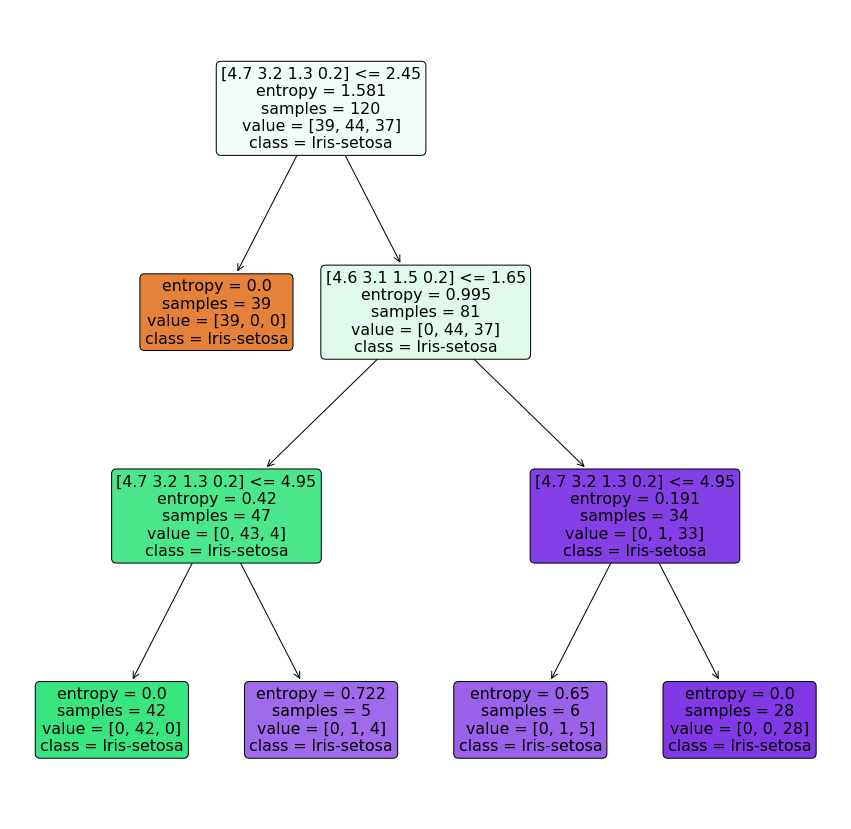

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree=plot_tree(clf_entropy,feature_names=X.values,class_names=Y.values,filled=True,rounded=True)